# **Retrieving data from OpenStreetMap**

## goals of the tutorial
- understand openstreetmap
- understand the openstreetmap data model
- manage openstreetmap data in geopandas

### requirements
- python knowledge
- geopandas
- gis concepts

### status
"OpenStreetMap is a commons"
---

# Setup

In [ ]:
!pip install -U pygeos

     |████████████████████████████████| 1.6MB 2.7MB/s 


In [ ]:
!pip install geopandas

In [ ]:
!pip install pyrosm

# OpenStreetMap

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/osm.png)

[slide](https://docs.google.com/presentation/d/e/2PACX-1vT91FHgpKShrTx4H6AlsmLmAb00Pe0QUB_LKugBdoP1N6pAl_sdFKKnDu0msDzmTwxjI7OXh-dbPb-K/pub?start=false&loop=false&delayms=3000)

# RAW Data
OSM XML
![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/osmdata1.png)

...

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/osmdata2.png)

...

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/osmdata3.png)

# OverPass API

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/overpassturbo.png)

http://overpass-turbo.eu/

## Protocol Buffer
https://developers.google.com/protocol-buffers 

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/pbf.png)

Export from HOTOSM

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/export_hotosm.png)

https://export.hotosm.org/en/v3/exports/91f6bf76-f310-46fe-a6dd-8f230489d1aa

## PYROSM

OpenStreetMap PBF data parser for Python

note: install it always after geopandas

In [ ]:
!pip install geopandas

In [ ]:
!pip install pyrosm

In [ ]:
import geopandas as gpd

In [ ]:
import pyrosm
from pyrosm.data import sources

Print available source categories

In [ ]:
sources.available.keys()

dict_keys(['africa', 'antarctica', 'asia', 'australia_oceania', 'central_america', 'europe', 'north_america', 'south_america', 'cities', 'subregions'])

Prints a list of countries in Europa that can be downloaded

In [ ]:
sources.europe.available

['albania',
 'andorra',
 'austria',
 'azores',
 'belarus',
 'belgium',
 'bosnia_herzegovina',
 'bulgaria',
 'croatia',
 'cyprus',
 'czech_republic',
 'denmark',
 'estonia',
 'faroe_islands',
 'finland',
 'france',
 'georgia',
 'germany',
 'great_britain',
 'greece',
 'hungary',
 'iceland',
 'ireland_and_northern_ireland',
 'isle_of_man',
 'italy',
 'kosovo',
 'latvia',
 'liechtenstein',
 'lithuania',
 'luxembourg',
 'macedonia',
 'malta',
 'moldova',
 'monaco',
 'montenegro',
 'netherlands',
 'norway',
 'poland',
 'portugal',
 'romania',
 'russia',
 'serbia',
 'slovakia',
 'slovenia',
 'spain',
 'sweden',
 'switzerland',
 'turkey',
 'ukraine']

Print a list of all cities that can be downloaded

In [ ]:
sources.cities.available

['Aachen',
 'Aarhus',
 'Adelaide',
 'Albuquerque',
 'Alexandria',
 'Amsterdam',
 'Antwerpen',
 'Arnhem',
 'Auckland',
 'Augsburg',
 'Austin',
 'Baghdad',
 'Baku',
 'Balaton',
 'Bamberg',
 'Bangkok',
 'Barcelona',
 'Basel',
 'Beijing',
 'Beirut',
 'Berkeley',
 'Berlin',
 'Bern',
 'Bielefeld',
 'Birmingham',
 'Bochum',
 'Bogota',
 'Bombay',
 'Bonn',
 'Bordeaux',
 'Boulder',
 'BrandenburgHavel',
 'Braunschweig',
 'Bremen',
 'Bremerhaven',
 'Brisbane',
 'Bristol',
 'Brno',
 'Bruegge',
 'Bruessel',
 'Budapest',
 'BuenosAires',
 'Cairo',
 'Calgary',
 'Cambridge',
 'CambridgeMa',
 'Canberra',
 'CapeTown',
 'Chemnitz',
 'Chicago',
 'ClermontFerrand',
 'Colmar',
 'Copenhagen',
 'Cork',
 'Corsica',
 'Corvallis',
 'Cottbus',
 'Cracow',
 'CraterLake',
 'Curitiba',
 'Cusco',
 'Dallas',
 'Darmstadt',
 'Davis',
 'DenHaag',
 'Denver',
 'Dessau',
 'Dortmund',
 'Dresden',
 'Dublin',
 'Duesseldorf',
 'Duisburg',
 'Edinburgh',
 'Eindhoven',
 'Emden',
 'Erfurt',
 'Erlangen',
 'Eugene',
 'Flensburg',
 'Fort

Check all countries having sub-regions


In [ ]:
sources.subregions.available.keys()

dict_keys(['brazil', 'canada', 'france', 'germany', 'great_britain', 'italy', 'japan', 'netherlands', 'poland', 'russia', 'usa'])

Check sub-regions in Italy


In [ ]:
sources.subregions.italy.available


['centro', 'isole', 'nord_est', 'nord_ovest', 'sud']

there aren't other subregions or cities ... 

In [ ]:
!wget https://github.com/napo/geospatial_course_unitn/raw/master/data/openstreetmap/trento.osm.pbf

--2020-10-15 22:20:03--  https://github.com/napo/geospatial_course_unitn/raw/master/data/openstreetmap/trento.osm.pbf
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/data/openstreetmap/trento.osm.pbf [following]
--2020-10-15 22:20:04--  https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/data/openstreetmap/trento.osm.pbf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11180448 (11M) [application/octet-stream]
Saving to: ‘trento.osm.pbf.2’

trento.osm.pbf.2    100%[===================>]  10.66M  19.6MB/s    in 0.5s    

2020-10-15 22:20:05 (19.6 MB

In [ ]:
!wget https://github.com/napo/geospatial_course_unitn/raw/master/data/openstreetmap/trento_boundary.geojson

--2020-10-15 22:20:05--  https://github.com/napo/geospatial_course_unitn/raw/master/data/openstreetmap/trento_boundary.geojson
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/data/openstreetmap/trento_boundary.geojson [following]
--2020-10-15 22:20:05--  https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/data/openstreetmap/trento_boundary.geojson
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11532 (11K) [text/plain]
Saving to: ‘trento_boundary.geojson.2’

trento_boundary.geo 100%[===================>]  11.26K  --.-KB/s    in 0s      

2020-10-1

In [ ]:
!pwd

/content


In [ ]:
trento_boundary = gpd.read_file("trento_boundary.geojson")

In [ ]:
bbox_geom = trento_boundary['geometry'].values[0]

In [ ]:
# Get the shapely geometry from GeoDataFrame
bbox_geom = trento_boundary['geometry'].values[0]

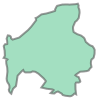

In [ ]:
bbox_geom

In [ ]:
osm = pyrosm.OSM("/content/trento.osm.pbf",bounding_box=bbox_geom)

In [ ]:
osm.conf.tags.available

['aerialway',
 'aeroway',
 'amenity',
 'boundary',
 'building',
 'craft',
 'emergency',
 'geological',
 'highway',
 'historic',
 'landuse',
 'leisure',
 'natural',
 'office',
 'power',
 'public_transport',
 'railway',
 'route',
 'place',
 'shop',
 'tourism',
 'waterway']

In [ ]:
osm.conf.tags.amenity

['addr:city',
 'addr:country',
 'addr:full',
 'addr:housenumber',
 'addr:housename',
 'addr:postcode',
 'addr:place',
 'addr:street',
 'email',
 'name',
 'opening_hours',
 'operator',
 'phone',
 'ref',
 'url',
 'website',
 'yes',
 'amenity',
 'arts_centre',
 'atm',
 'bank',
 'bicycle_parking',
 'bicycle_rental',
 'bicycle_repair_station',
 'bar',
 'bbq',
 'biergarten',
 'brothel',
 'building',
 'building:levels',
 'bureau_de_change',
 'bus_station',
 'bus_stop',
 'cafe',
 'car_rental',
 'car_repair',
 'car_sharing',
 'car_wash',
 'casino',
 'charging_station',
 'childcare',
 'cinema',
 'clinic',
 'college',
 'dentist',
 'doctors',
 'driving_school',
 'drinking_water',
 'fast_food',
 'ferry_terminal',
 'fire_station',
 'food_court',
 'fountain',
 'fuel',
 'gambling',
 'hospital',
 'ice_cream',
 'internet_access',
 'kindergarten',
 'landuse',
 'language_school',
 'library',
 'music_school',
 'nightclub',
 'nursing_home',
 'office',
 'operator',
 'parking',
 'pharmasy',
 'planetarium',
 '

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs


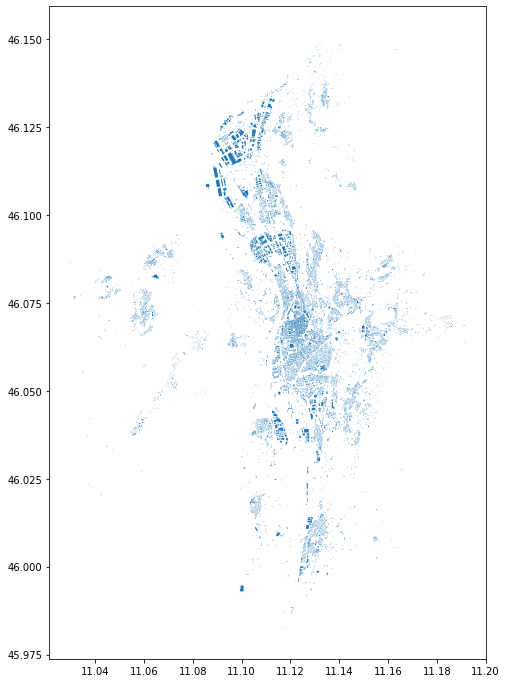

In [ ]:
buildings = osm.get_buildings()
buildings.plot(figsize=(12,12))
%time

In [ ]:
buildings.head(4)

,addr:city,addr:country,addr:housenumber,addr:housename,addr:postcode,addr:place,addr:street,email,name,opening_hours,operator,phone,url,website,building,amenity,building:levels,building:material,building:min_level,building:use,craft,height,internet_access,landuse,office,shop,source,start_date,wikipedia,id,timestamp,version,geometry,tags,osm_type,levels,changeset
0,None,None,18,None,38122,None,Piazza del Duomo,None,Palazzo Pretorio,None,None,+39 0461 234419,None,http://museodiocesanotridentino.it,yes,None,None,None,None,None,None,None,None,None,None,None,None,None,it:Palazzo_Pretorio_(Trento),24785843,1594291784,8,"POLYGON ((11.12216 46.06701, 11.12205 46.06701...","{""access"":""customers"",""castle_type"":""palace"",""...",way,NaN,NaN
1,None,None,None,None,None,None,None,None,P3 - Garage Autosilo Buonconsiglio,None,Trentino Mobilità S.p.A.,None,None,None,parking,parking,None,None,None,None,None,20,None,None,None,None,None,None,None,24860487,1545761896,17,"POLYGON ((11.12432 46.07414, 11.12430 46.07420...","{""capacity"":""480"",""capacity:disabled"":""yes"",""c...",way,NaN,NaN
2,None,None,None,None,None,None,None,None,Laboratori Ingegneria,None,None,None,None,None,university,None,None,None,None,None,None,None,None,None,None,None,None,None,None,24862284,1593194970,4,"POLYGON ((11.13954 46.06698, 11.13948 46.06644...",None,way,NaN,NaN
3,None,None,None,None,None,None,None,None,Mensa e bar Mesiano,None,None,None,None,None,university,restaurant,None,None,None,None,None,None,None,None,None,None,None,None,None,24862387,1593194970,2,"POLYGON ((11.13982 46.06637, 11.13981 46.06612...",None,way,NaN,NaN


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs


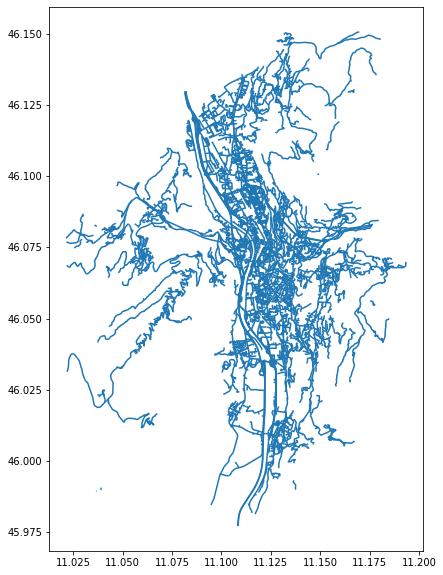

In [ ]:
drive_net = osm.get_network(network_type="driving")
drive_net.plot(figsize=(10,10))
%time

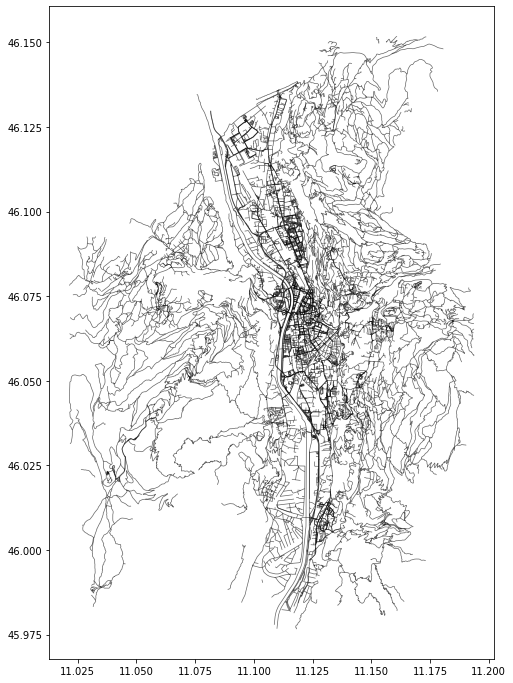

In [ ]:
walk = osm.get_network("walking")
walk.plot(color="k", figsize=(12,12), lw=0.7, alpha=0.6)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs


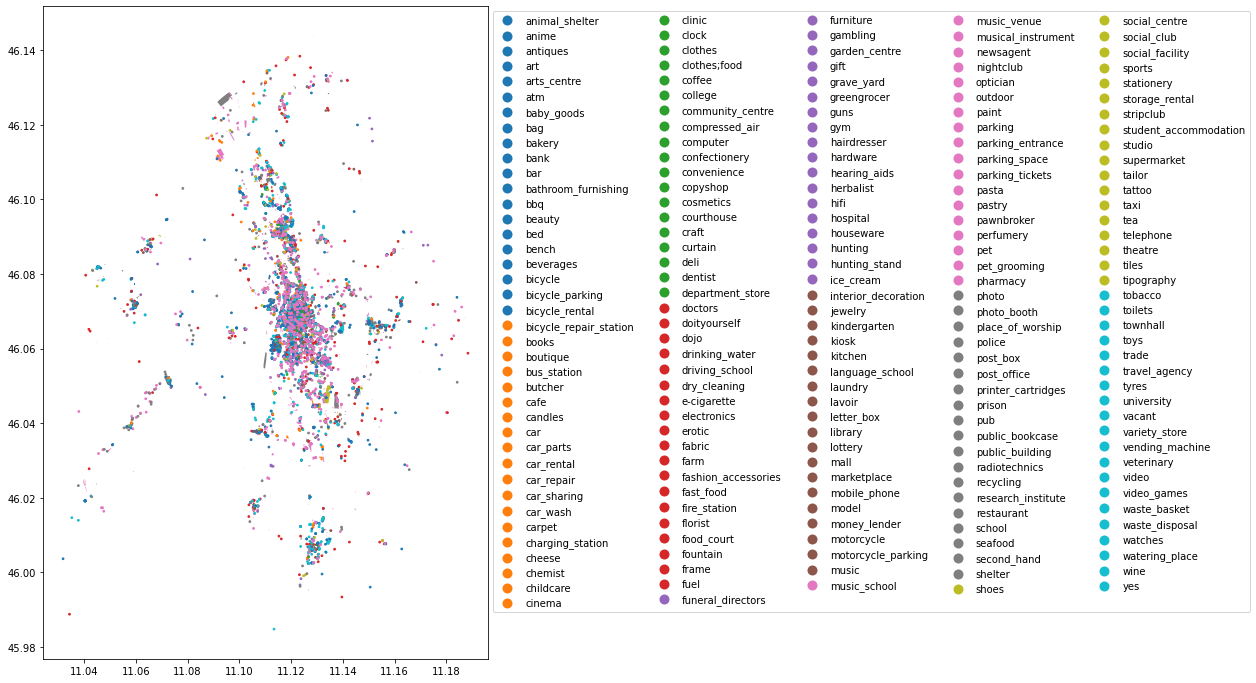

In [ ]:
custom_filter = {'amenity': True, "shop": True}
pois = osm.get_pois(custom_filter=custom_filter)

# Gather info about POI type (combines the tag info from "amenity" and "shop")
pois["poi_type"] = pois["amenity"]
pois["poi_type"] = pois["poi_type"].fillna(pois["shop"])

# Plot
ax = pois.plot(column='poi_type', markersize=3, figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=5, bbox_to_anchor=(1, 1)))

%time

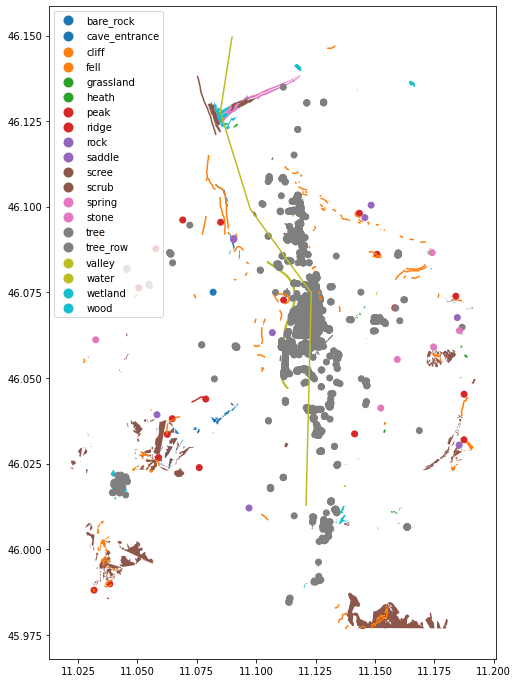

In [ ]:
natural = osm.get_natural()
natural.plot(column='natural', legend=True, figsize=(12,12))

---
# Exercises
- download from OpenStreetMap all supermarkets inside the bounding box of the city with this the coordinate <br/>latitude: 46.21209<br/>
longitude: 11.09351<br/>
- identify the longest road of the city (state roads, walking routes, motorways are excluded)
- How many drinking ware are in this city?
- how many benches in this city have the backrest?

suggestion: on the website http://www.geodati.fmach.it/italia_osm.html you can find PBF at regional level of Italy
